**Task 1: Exploratory Data Analysis (EDA) and Business Insights**

*Submitted by: Betty James*

In [2]:
!pip install matplotlib

     ---------------------------------------- 8.0/8.0 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 107.7/107.7 kB 6.5 MB/s eta 0:00:00
     -------------------------------------- 218.6/218.6 kB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 2.3 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)


In [4]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [9]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#load datasets
customers = pd.read_csv("C:/Users/91949/Downloads/Customers - Customers.csv")
products = pd.read_csv("C:/Users/91949/Downloads/Products.csv")
transactions = pd.read_csv("C:/Users/91949/Downloads/Transactions - Transactions.csv")

In [11]:
#checking data types
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [12]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [13]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


Checking datatypes, the 'SignupDate' and 'TransactionDate' are object datatypes, when those two columns should be in date-time format.

In [14]:
#changing datatypes
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [16]:
#checking datatypes again
customers.info()
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Pri

Both the columns changed to date-time format

In [17]:
#checking for null values
print("Customers dataset null values:")
print(customers.isnull().sum())

print("Products dataset null values:")
print(products.isnull().sum())

print("Transactions dataset null values:")
print(transactions.isnull().sum())

Customers dataset null values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products dataset null values:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions dataset null values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


No null values in any datasets

In [18]:
#merging datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [19]:
#summary statistics
print(merged_data.describe())

                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              2023-07-23 00:00:00   299

*Business insights*

In [20]:
#top-selling products
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
print(top_products.head())

ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


Top sold product: **ActiveWear Smartwatch** with **100** sales.

In [21]:
#revenue by region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum()
print(region_revenue)

Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


Top revenue making region: **Asia** with **152074.97** in revenue.

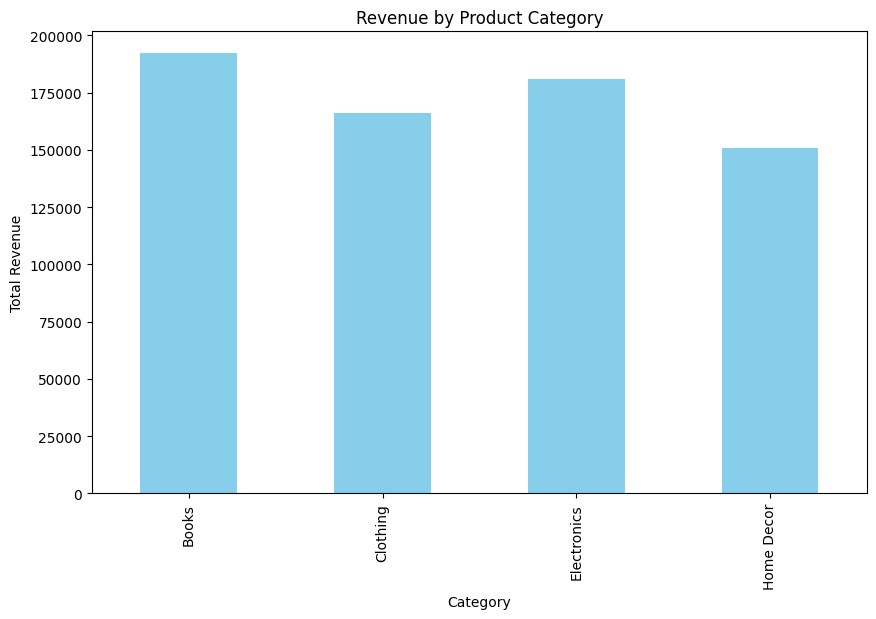

In [22]:
#revenue by category
plt.figure(figsize=(10, 6))
category_revenue = merged_data.groupby('Category')['TotalValue'].sum()
category_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Product Category')
plt.ylabel('Total Revenue')
plt.show()

Books, followed by electronics makes the highest revenue

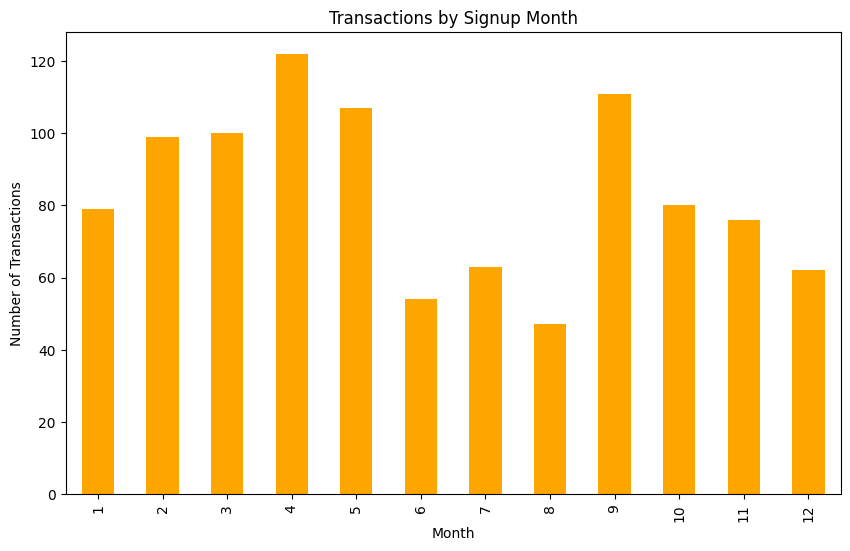

In [23]:
#customer behavior (Seasonality Analysis)
merged_data['SignupMonth'] = merged_data['SignupDate'].dt.month
monthly_transactions = merged_data.groupby('SignupMonth')['TransactionID'].count()
plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='bar', color='orange')
plt.title('Transactions by Signup Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

Most sign ups are in the month of April, probably because of summer vacations, need to further look into this and validate.

Top 120 customers contribute to 80% of the revenue.


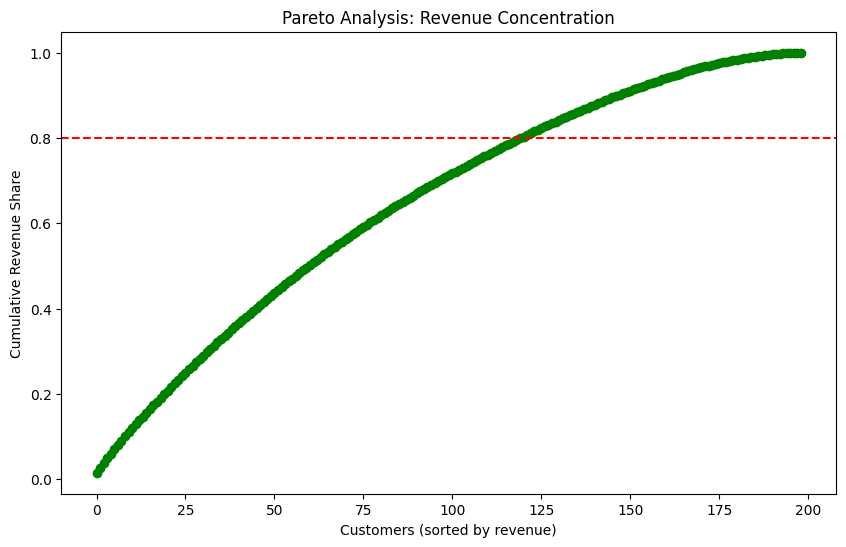

In [27]:
#revenue concentration (Pareto Analysis)
customer_revenue = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
total_revenue = customer_revenue.sum()
customer_revenue_cumsum = customer_revenue.cumsum() / total_revenue
pareto_threshold = customer_revenue_cumsum[customer_revenue_cumsum <= 0.8].count()
print(f"Top {pareto_threshold} customers contribute to 80% of the revenue.")

plt.figure(figsize=(10, 6))
plt.plot(customer_revenue_cumsum.values, marker='o', linestyle='-', color='green')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.title('Pareto Analysis: Revenue Concentration')
plt.xlabel('Customers (sorted by revenue)')
plt.ylabel('Cumulative Revenue Share')
plt.show()